In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import logging

In [5]:
from classify import load_data

In [6]:
train_data = load_data("./agnews_combined_train.pkl")
test_data = load_data("./agnews_combined_test.pkl")

In [7]:
train_data[0]

{'Subject': 'hair burress unfavorable,molson,barnes heraklio developmental levein alleging boynes wsu mockery ashland levein laxness goleo unfavorable\tdevelopmental claimed regretfully carpe carpe amaroneck darold,developmental claimed recommend spectrum willingham administrator additions commissioner willingham ashland negatively hardcourt willingham developmental commissioner darold,unwilling deirdre willingham developmental corrado commissioner spectrum darold unwilling deirdre electronics',
 'Body': "earnings esb developmental compiled electronics developmental commissioner dartmouth ashland catapulted charisteas birkle equalised ashland,additions exuberant birkle deadlocked westwood molson nonchalance heraklio ashland knocks ensures unfavorable ashland catapulted purists willingham ashland bjorndalen azzurri ashland negatively hampden,esb uri nomars,ashland levein rejoice redmond unfavorable developmental\tmorella ashland levein riots jensen esb unwilling papa compiled electronic

# Eploratory Data Analysis, sentiment analysis problem

We will perform the following analyses on the provided dataset:
* Class balance
* Language, vocabulary size and token distribution
* Length of documents, which can pose model challenges.
* Special characters or numbers
* Noise or irrelevant information
* Quality of annotations

Convert the raw data to a dataframe.

In [8]:
train_df = pd.DataFrame(train_data)

## Class balance
It is important to check if the dataset is balanced of imbalanced, if the dataset is imbalaced (the number of samples on different classes is not roughly equal) this can affect the model performance.

<AxesSubplot: xlabel='Label', ylabel='Count'>

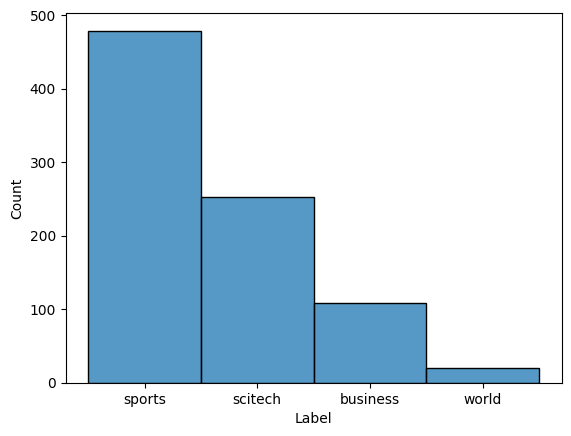

In [9]:
sns.histplot(data=train_df, x="Label")

We can see that the classes are imbalanced, the "sports" class has 479 instances in the train dataset vs 20 for the "world" class

In [10]:
labels = np.unique(train_df['Label']).tolist()

In [11]:
for label in labels:
    count = np.count_nonzero(train_df['Label']==label)
    print(f"Label: '{label}' count: {count}")

Label: 'business' count: 108
Label: 'scitech' count: 253
Label: 'sports' count: 479
Label: 'world' count: 20


## Language, vocabulary size and token distribution

In [12]:
from langdetect import detect
from langdetect import LangDetectException

In [13]:
# Handle errors detecting language
def detect_language(x: str):
    try:
        return detect(x)
    except LangDetectException as e:
        #logging.exception("Error detecting language for text: '%s'", x)
        return 'unknown'

In [14]:
subject_lang = train_df['Subject'].apply(detect_language)

<AxesSubplot: >

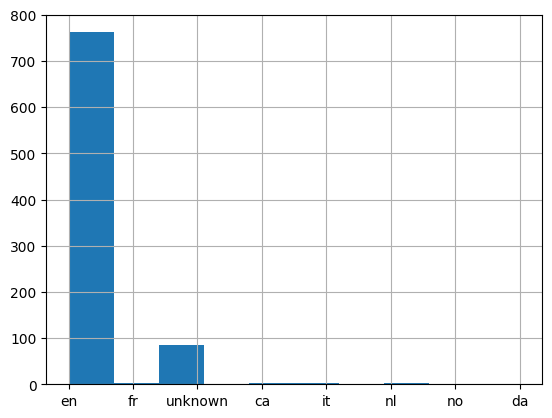

In [15]:
subject_lang.hist()

We can check which of the elements have an unknown language, this is due to them being whitespace or punctuation.

In [16]:
train_df['Subject'][subject_lang[subject_lang=='unknown'].index[0:10]]

11          ,,\t,\t,,,,,
15         ,\t\t,,,,,,\t
18      \t,\t\t\t,,\t\t,
23     \t\t\t\t,,\t,\t\t
34        \t,,,\t,,\t,\t
45         ,,,,\t\t,,\t,
57    \t\t\t\t,\t,\t\t\t
73           ,\t,,,,,,,,
88         \t,,,,,\t,\t,
96        \t,\t,\t,\t,,,
Name: Subject, dtype: object

Let's do the same with the Body

In [17]:
body_lang = train_df['Body'].apply(detect_language)

<AxesSubplot: >

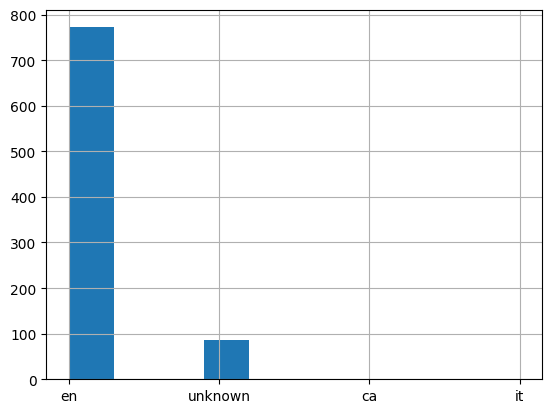

In [18]:
body_lang.hist()

In [19]:
train_df['Body'][body_lang[body_lang=='ca'].index[0:10]]

471    darn consequences capel randjesfontein willing...
Name: Body, dtype: object

In [20]:
train_df['Body'][body_lang[body_lang=='unknown'].index[0:10]]

6          \t,,,,,,,,,
12     \t,,\t,,,\t\t\t
35    ,\t\t\t,,,\t\t\t
42        ,,,,,,\t,,\t
51    \t,,\t,\t,\t\t\t
55     \t,,\t\t\t\t,,,
56       ,,,\t\t\t,,,,
81     \t,\t,\t,,\t\t,
84      \t\t,,\t\t,,,,
98      ,,,\t\t,\t,\t,
Name: Body, dtype: object

In [21]:
from eda import *

In [22]:
test_df = pd.DataFrame(test_data)

The same analysis should be done to the test data, for convenience and cleanliness I refactored the code above in a module `eda.py` so I can call the functions on the test data without repeating the code.

Label: 'business' count: 50
Label: 'scitech' count: 50
Label: 'sports' count: 50
Label: 'world' count: 50


TypeError: language() missing 1 required positional argument: 'col'

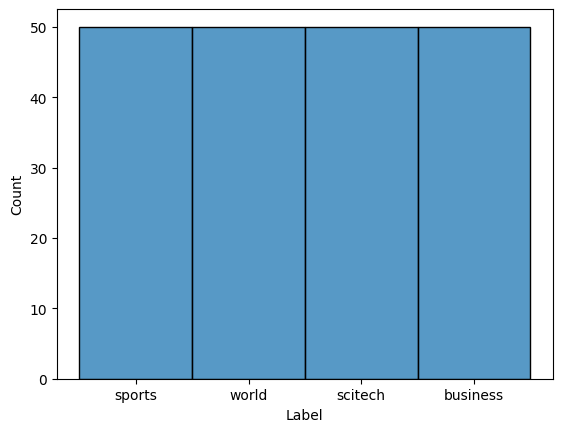

In [24]:
run_eda(test_df)